### Student Information
Name:李昀叡

Student ID:110062624

GitHub ID:YRLIWTM

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# First Part

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Begin Assignment Here
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [4]:
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [5]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
X['category'] = twenty_train.target

In [7]:
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [8]:
# select top 10 data with category 0
print(X.query('category == 0 ')[:10])

print("============================================")
# count the number of category 0
print(len(X.query('category == 0 ')))

                                                 text  category category_name
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   alt.atheism
13  Subject: So what is Maddi? From: madhaus@netco...         0   alt.atheism
17  Organization: Penn State University From: <JSN...         0   alt.atheism
19  Subject: Re: Don't more innocents die without ...         0   alt.atheism
21  From: gmiller@worldbank.org (Gene C. Miller) S...         0   alt.atheism
36  From: keith@cco.caltech.edu (Keith Allan Schne...         0   alt.atheism
37  From: bcash@crchh410.NoSubdomain.NoDomain (Bri...         0   alt.atheism
38  From: darice@yoyo.cc.monash.edu.au (Fred Rice)...         0   alt.atheism
41  From: sandvik@newton.apple.com (Kent Sandvik) ...         0   alt.atheism
45  From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...         0   alt.atheism
480


### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [9]:
X[X['category_name']=='sci.med'].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [10]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [11]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [12]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [13]:
# Answer here
# Because in cases "id = C, D, F" , their "missing_example" are string type
# So, isnull() can't find those missingvalues

In [14]:
X_sample = X.sample(n=1000) #random state

In [15]:
X_sample

,text,category,category_name
1339,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
1885,From: dewey@risc.sps.mot.com (Dewey Henize) Su...,0,alt.atheism
662,From: bruce@liv.ac.uk (Bruce Stephens) Subject...,3,soc.religion.christian
1323,From: max@slinky.NYU.EDU (David Max) Subject: ...,1,comp.graphics
1126,From: gerhard@vmars.tuwien.ac.at (Gerhard Fohl...,3,soc.religion.christian
...,...,...,...
468,From: king@reasoning.com (Dick King) Subject: ...,2,sci.med
599,From: cs89ssg@brunel.ac.uk (Sunil Gupta) Subje...,1,comp.graphics
1549,From: mark@ocsmd.ocs.com (Mark Wilson) Subject...,1,comp.graphics
1759,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [16]:
# Answer here
# We can see that the selected data are in random order index by the above cell
#And there are similar ratios in all the categories in X and X_sample by this cell

print(X[X["category"]==0].count()[0]/X.count()[0])
print(X[X["category"]==1].count()[0]/X.count()[0])
print(X[X["category"]==2].count()[0]/X.count()[0])
print(X[X["category"]==3].count()[0]/X.count()[0])

print(X_sample[X_sample["category"]==0].count()[0]/X_sample.count()[0])
print(X_sample[X_sample["category"]==1].count()[0]/X_sample.count()[0])
print(X_sample[X_sample["category"]==2].count()[0]/X_sample.count()[0])
print(X_sample[X_sample["category"]==3].count()[0]/X_sample.count()[0])

0.21267168808152415
0.25875055383252105
0.2631812140008861
0.2653965440850687
0.202
0.27
0.264
0.264


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

comp.graphics             270
soc.religion.christian    264
sci.med                   264
alt.atheism               202
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

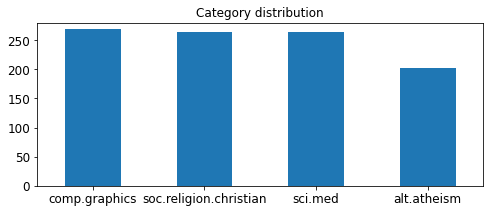

In [18]:
upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

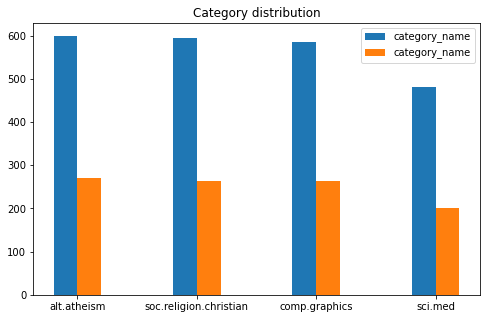

In [19]:
# Answer here
plt.figure(figsize=(8, 5))
plt.title("Category distribution")
plt.bar(categories,X["category_name"].value_counts(),align='edge',width=-0.2,label="category_name")
plt.bar(categories,X_sample["category_name"].value_counts(),align='edge',width=0.2,label="category_name")
plt.legend()
plt.show()

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/liyunrui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [23]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [24]:
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [25]:
# Answer here
X_fifth_row = X_counts[4, 0:100]
X_fifth_row_notzero_item_index = np.argwhere(X_fifth_row == 1)
print(count_vect.get_feature_names()[X_fifth_row_notzero_item_index[1][1]])

01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

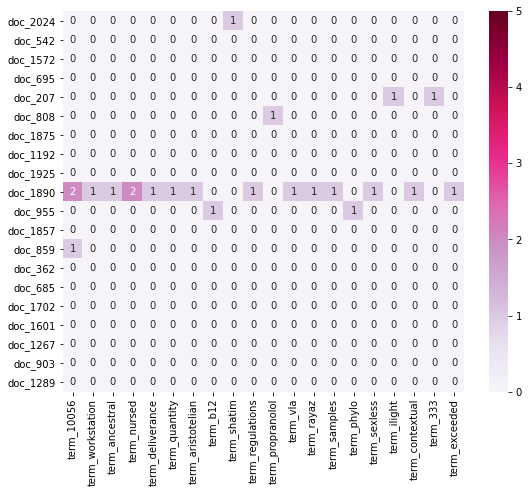

In [26]:
# Answer here

# Sample 20 documents and 20 term

import seaborn as sns
from random import sample 

X_sample = X.sample(20)
count_sample_vect = CountVectorizer()
X_count_sample = count_sample_vect.fit_transform(X_sample.text)

sample_feature_names = sample(count_vect.get_feature_names(), 20)

plot_x = ["term_"+str(i) for i in sample_feature_names]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]
plot_z = X_count_sample[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

In [27]:
from sklearn.decomposition import PCA

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

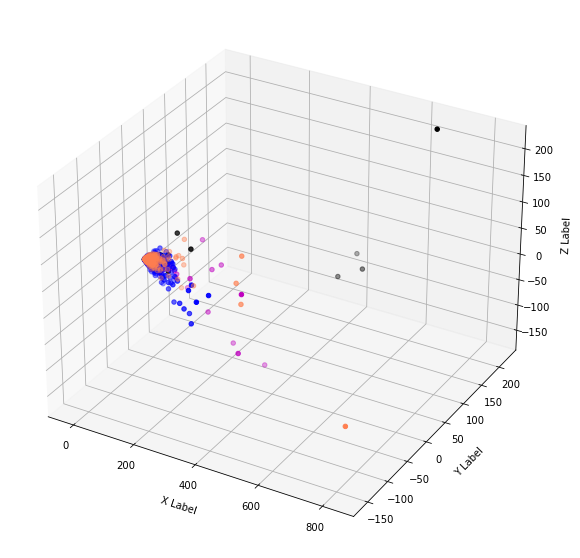

In [28]:
# Answer here

# Angle 1
# There is only a few points are discrete, others are crowed for all color points, so it's difficult to classify
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

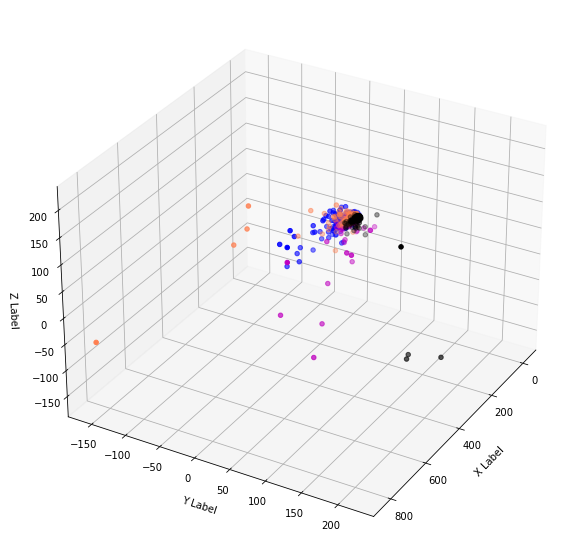

In [29]:
# Answer here
#from mpl_toolkits.mplot3d import Axes3D

# Angle 2

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=30,azim=30)

plt.show()

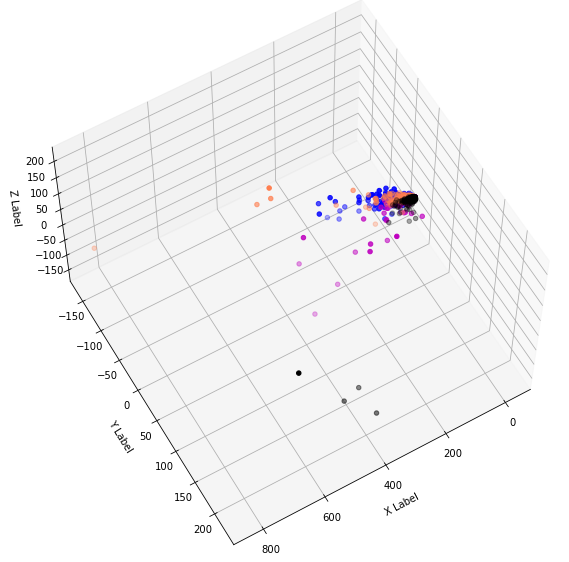

In [30]:
# Answer here
#from mpl_toolkits.mplot3d import Axes3D

# Angle 3

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=60,azim=60)

plt.show()

In [31]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [32]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [33]:
# Answer here
import plotly.graph_objects as pltgo

X_counts = count_vect.fit_transform(X.text)

x = [str(i) for i in count_vect.get_feature_names()][:300]
y = term_frequencies[:300]

g = pltgo.Figure()
g.add_trace(pltgo.Bar(x=x, y=y))
g.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [34]:
# Answer here

# We can do a sample at the beginning

X_sample = X.sample(n=1000)
X_sample_counts = count_vect.fit_transform(X_sample.text)

term_frequencies = []
for j in range(0,X_sample_counts.shape[1]):
    term_frequencies.append(sum(X_sample_counts[:,j].toarray()))

term_frequencies = np.asarray(X_sample_counts.sum(axis=0))[0]


x = [str(i) for i in count_vect.get_feature_names()][:300]
y = term_frequencies[:300]

g = pltgo.Figure()
g.add_trace(pltgo.Bar(x=x, y=y))
g.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [35]:
# Answer here

temp_dict = {"feature" : [str(i) for i in count_vect.get_feature_names()] , "freq" : term_frequencies}
temp_dataframe = pd.DataFrame(temp_dict)
sorted_df = temp_dataframe.sort_values(by="freq",ascending=False)

x = sorted_df["feature"][:300]
y = sorted_df["freq"][:300]

g = pltgo.Figure()
g.add_trace(pltgo.Bar(x=x, y=y))
g.show()

In [36]:
import math

In [37]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [38]:
mlb = preprocessing.LabelBinarizer()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [39]:
# Answer here

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


# Second Part

## 2. Data Preparation
Now let us begin to explore the data. The original dataset can be found on the link provided above or you can directly use the version provided by scikit learn. Here we will use the scikit learn version. 

In this demonstration we are only going to look at 4 categories. This means we will not make use of the complete dataset, but only a subset of it, which includes the 4 categories defined below:

In [40]:
with open('/Users/liyunrui/Documents/datamining/DM2021-Lab1-Homework/sentiment labelled sentences/amazon_cells_labelled.txt','r') as temp_open:
    temp1 = temp_open.read().splitlines()
with open('/Users/liyunrui/Documents/datamining/DM2021-Lab1-Homework/sentiment labelled sentences/imdb_labelled.txt','r',encoding="utf-8") as temp_open:
    temp2 = temp_open.read().splitlines()
with open('/Users/liyunrui/Documents/datamining/DM2021-Lab1-Homework/sentiment labelled sentences/yelp_labelled.txt','r') as temp_open:
    temp3 = temp_open.read().splitlines()

data = []
data.append(temp1)
data.append(temp2)
data.append(temp3)

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [41]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X_second = pd.DataFrame(columns= ['text','score'])

index = 0
for i in range(len(data)):
    for row in data[i]:
        try:
            row = row.split("\t")
            X_second.loc[index,"text"] = row[0]
            X_second.loc[index,"score"] = row[1]
            index+=1
        except:
            print("err_format")
X_second.index

err_format
err_format


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
           dtype='int64', length=3000)

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [42]:
X_second.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

In [43]:
X_second.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [44]:
# There are some duplicated datas
sum(X_second.duplicated())

17

In [45]:
X_second.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [46]:
# There is no duplicated data now
sum(X_second.duplicated())

0

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [47]:
X_second_sample = X_second.sample(n=500) #random state

In [48]:
X_second_sample

,text,score
2207,The WORST EXPERIENCE EVER.,0
734,We have tried 2 units and they both failed wit...,0
741,"Couldn't use the unit with sunglasses, not goo...",0
2709,"I mean really, how do you get so famous for yo...",0
2050,We ordered the duck rare and it was pink and t...,1
...,...,...
846,Used and dirty.,0
2556,AVOID THIS ESTABLISHMENT!,0
2511,"Give it a try, you will be happy you did.",1
1799,How this piece of trash was ever released is b...,0


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

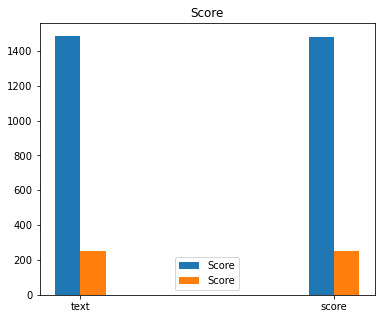

In [50]:
# Answer here
plt.figure(figsize=(6, 5))
plt.title("Score")
plt.bar(['text','score'],X_second["score"].value_counts(),align='edge',width=-0.1,label="Score")
plt.bar(['text','score'],X_second_sample["score"].value_counts(),align='edge',width=0.1,label="Score")
plt.legend()
plt.show()

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [51]:
import nltk

In [52]:
# takes a like a minute or two to process
X_second['unigrams'] = X_second['text'].apply(lambda x: dmh.tokenize_text(x))

In [53]:
X_second[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_second_counts = count_vect.fit_transform(X_second.text)

In [55]:
analyze = count_vect.build_analyzer()

In [56]:
# We can check the shape of this matrix by:
X_second_counts.shape

(2966, 5153)

In [57]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [58]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [59]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X_second.index)[0:20]]

In [60]:
plot_z = X_second_counts[0:20, 0:20].toarray()

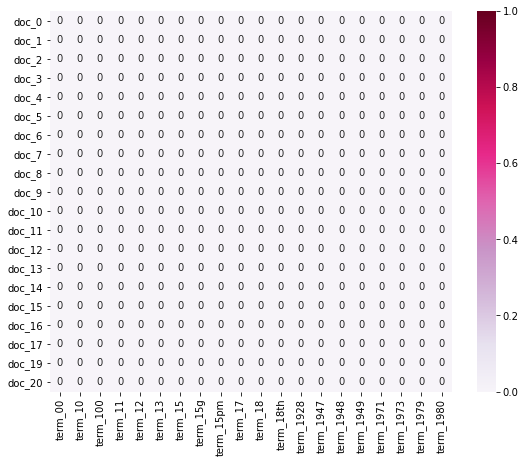

In [61]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

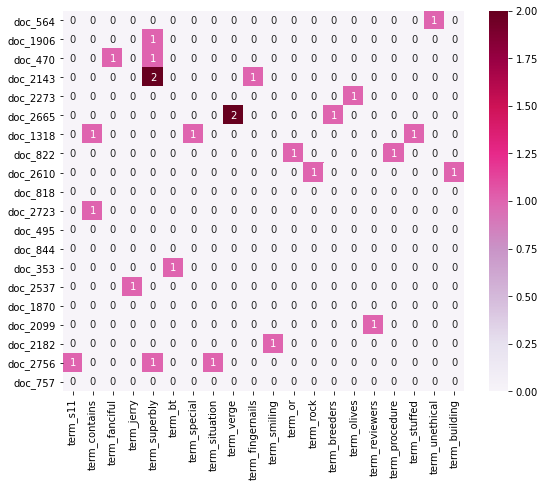

In [62]:
# Answer here

# Sample 20 documents and 20 term

from random import sample 

X_sample = X_second.sample(20)
count_sample_vect = CountVectorizer()
X_count_sample = count_sample_vect.fit_transform(X_sample.text)

sample_feature_names = sample(count_vect.get_feature_names(), 20)

plot_x = ["term_"+str(i) for i in sample_feature_names]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]
plot_z = X_count_sample[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

In [63]:
from sklearn.decomposition import PCA

In [64]:
X_second_reduced = PCA(n_components = 2).fit_transform(X_second_counts.toarray())

In [65]:
X_second_reduced.shape

(2966, 2)

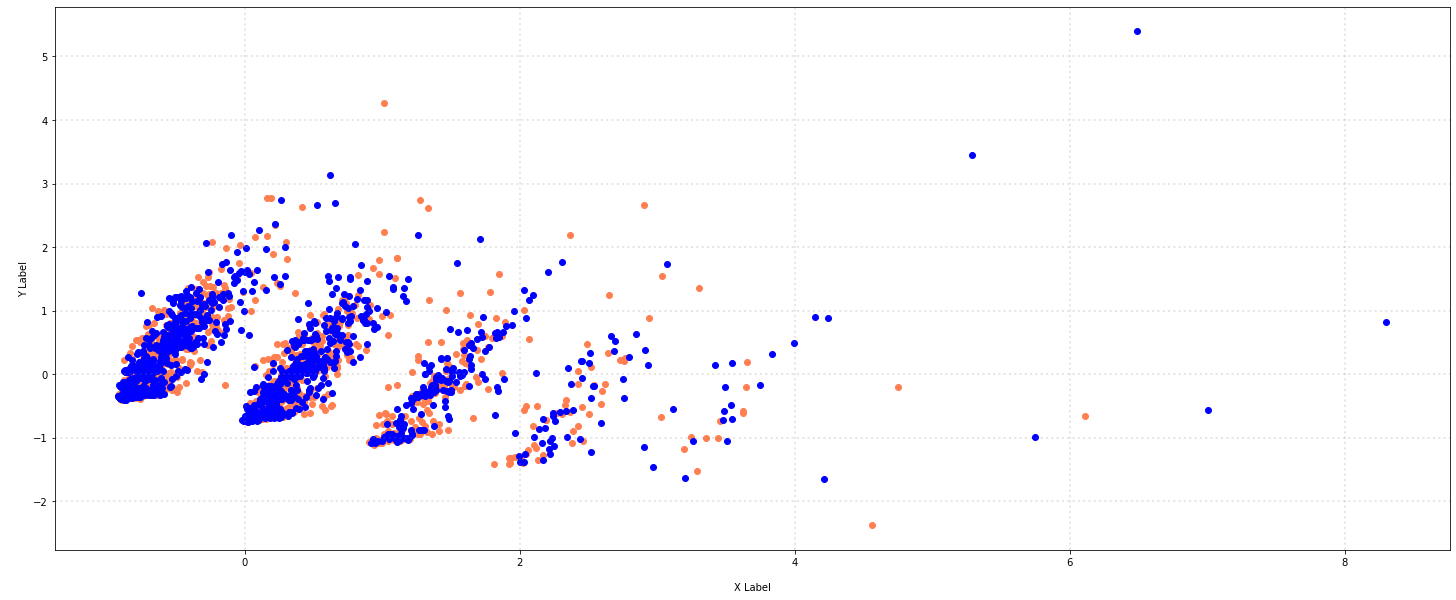

In [66]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
categories = ['0' , '1']

for c, category in zip(col, categories):
    xs = X_second_reduced[X_second['score'] == category].T[0]
    ys = X_second_reduced[X_second['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [67]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_second_counts.shape[1]):
    term_frequencies.append(sum(X_second_counts[:,j].toarray()))

In [68]:
term_frequencies = np.asarray(X_second_counts.sum(axis=0))[0]

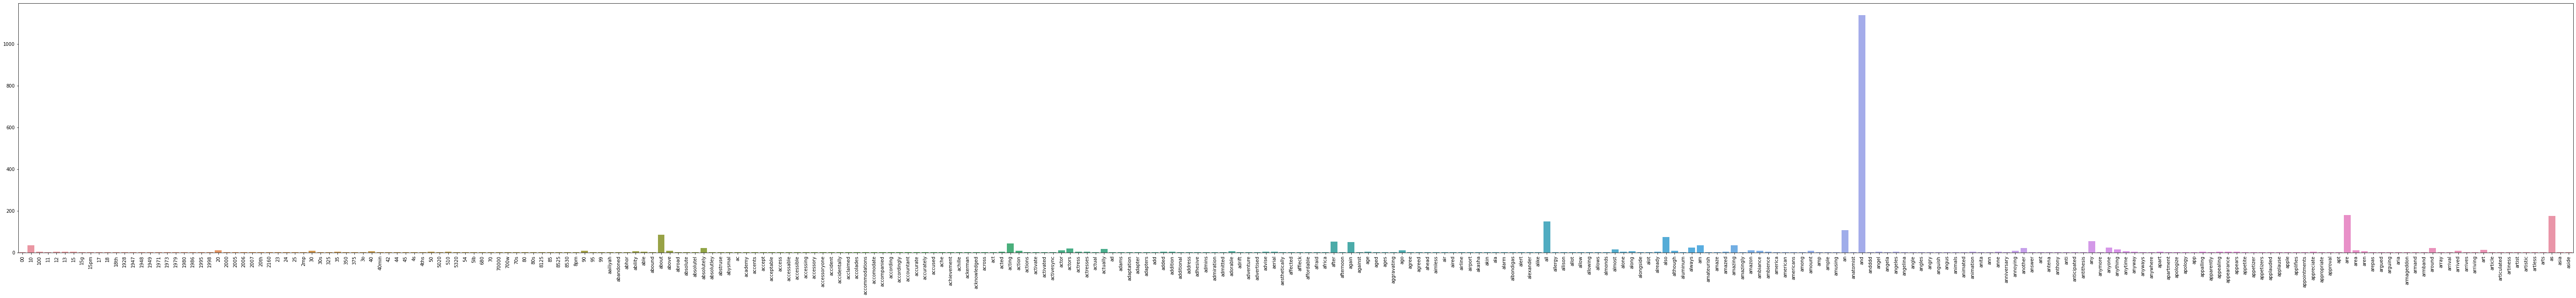

In [69]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [70]:
# Answer here
import plotly.graph_objects as pltgo

X_second_counts = count_vect.fit_transform(X_second.text)

x = [str(i) for i in count_vect.get_feature_names()][:300]
y = term_frequencies[:300]

g = pltgo.Figure()
g.add_trace(pltgo.Bar(x=x, y=y))
g.show()

In [71]:
# Answer here

# We can do a sample at the beginning

X_second_sample = X_second.sample(n=1000)
X_second_sample_counts = count_vect.fit_transform(X_second_sample.text)

term_frequencies = []
for j in range(0,X_second_sample_counts.shape[1]):
    term_frequencies.append(sum(X_second_sample_counts[:,j].toarray()))

term_frequencies = np.asarray(X_second_sample_counts.sum(axis=0))[0]


x = [str(i) for i in count_vect.get_feature_names()][:300]
y = term_frequencies[:300]

g = pltgo.Figure()
g.add_trace(pltgo.Bar(x=x, y=y))
g.show()

In [72]:
# Answer here

temp_dict = {"feature" : [str(i) for i in count_vect.get_feature_names()] , "freq" : term_frequencies}
temp_dataframe = pd.DataFrame(temp_dict)
sorted_df = temp_dataframe.sort_values(by="freq",ascending=False)

x = sorted_df["feature"][:300]
y = sorted_df["freq"][:300]

g = pltgo.Figure()
g.add_trace(pltgo.Bar(x=x, y=y))
g.show()

In [73]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

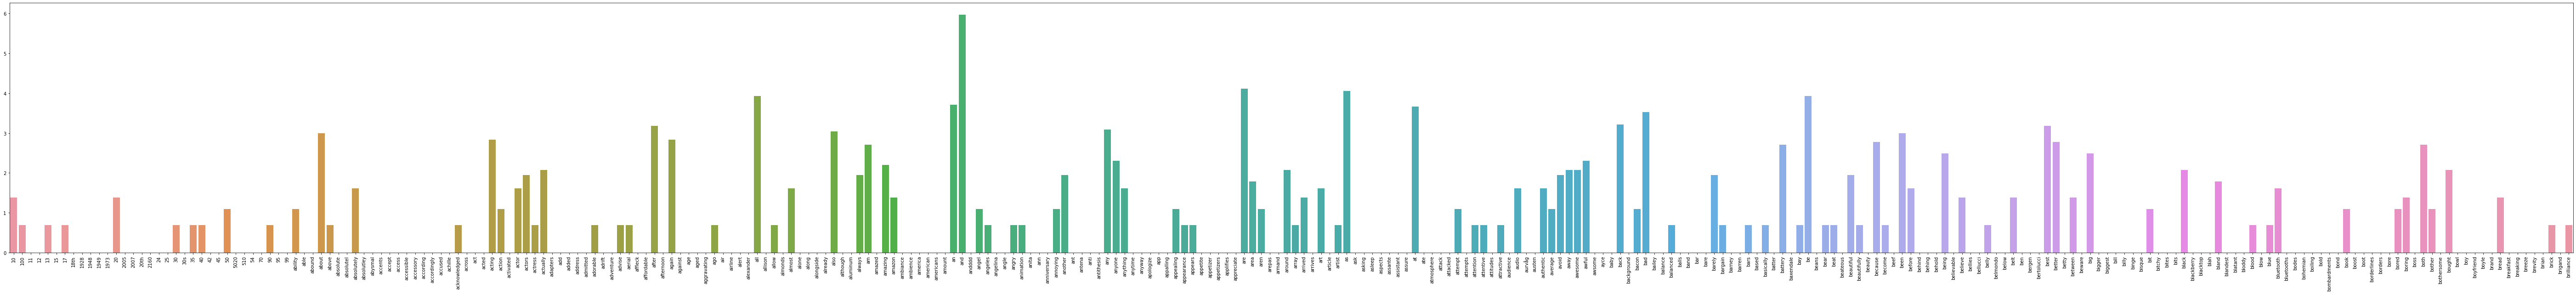

In [74]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [75]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [76]:
mlb = preprocessing.LabelBinarizer()

In [77]:
mlb.fit(X_second.score)

LabelBinarizer()

In [78]:
X_second['bin_score'] = mlb.transform(X_second['score']).tolist()

In [79]:
X_second[0:9]

,text,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# 6. Data Exploration

In [80]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X_second.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X_second.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X_second.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [81]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [82]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [83]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third Part

## New data visualizations

/Users/liyunrui/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning:

invalid value encountered in sqrt



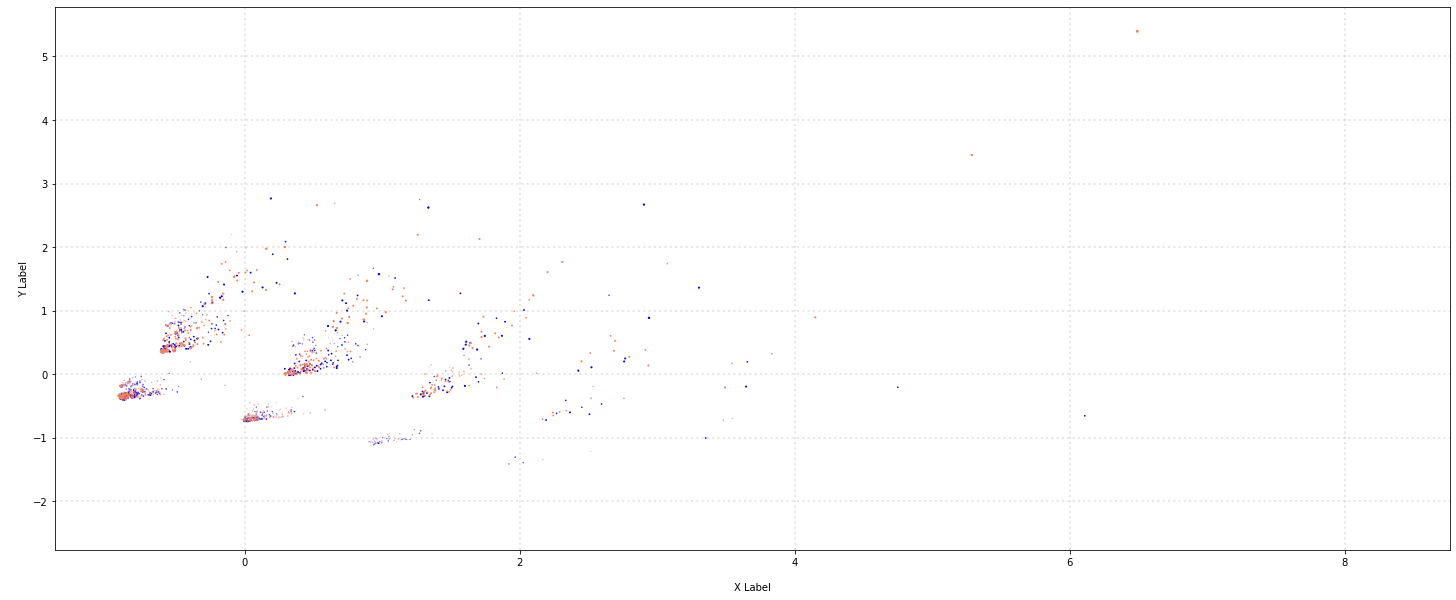

In [113]:
# We do something like 5.4 with components 3, then we can visualize again

from sklearn.decomposition import PCA
X_second_reduced = PCA(n_components = 3).fit_transform(X_second_counts.toarray())

col = ['blue', 'coral', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
categories = ['0' , '1']

for c, category in zip(col, categories):
    xs = X_second_reduced[X_second['score'] == category].T[0]
    ys = X_second_reduced[X_second['score'] == category].T[1]
    zs = X_second_reduced[X_second['score'] == category].T[2]
   
    ax.scatter(xs, ys, zs,  c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

## TF-IDF features

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit_transform(X_second.text)
vectorizer.get_feature_names()

# add tfidf column
tfidf = vectorizer.fit_transform(X_second['text']).toarray()
X_second['tfidf']=list(tfidf)
X_second

,text,score,unigrams,bin_score,tfidf
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,The mic is great.,1,"[The, mic, is, great, .]",[1],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Naive Bayes classifier

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics

model = GaussianNB()
NB_X = X_second['tfidf']
NB_Y = X_second['score']

NB_Y_label = preprocessing.LabelEncoder().fit_transform(NB_Y)
features = list(NB_X)

model.fit(features, NB_Y_label)
expected = NB_Y_label
predicted = model.predict(features)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1486
           1       1.00      0.84      0.91      1480

    accuracy                           0.92      2966
   macro avg       0.93      0.92      0.92      2966
weighted avg       0.93      0.92      0.92      2966

[[1485    1]
 [ 233 1247]]


# Fourth Part

We can try another dimention reduction method like correlation-based method, because the PCA graph is crowed and can not understand their distribution clearly.